# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets/Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

# 1. How many unique job titles are there?

In [3]:
# Your EDA code here
unique_job = df["job_title"].nunique()
print("Number of unique job titles:", unique_job)

Number of unique job titles: 93


## Answer:
>There are **93 unique job titles** in the dataset.

# 2. What is the average salary (salary_in_usd) per work_year?

In [4]:
avg = df.groupby("work_year")["salary_in_usd"].mean().round(2)
avg = avg.to_frame().reset_index()
avg.columns = ["Work Year", "Average Salary (USD)"]
avg

,Work Year,Average Salary (USD)
0,2020,92302.63
1,2021,94087.21
2,2022,133379.51
3,2023,148954.56


## Answer:
> The average salary in 2020 was **92,302.63**, in 2021 it was **94,087.21**, in 2022 it increased to **133,379.51**, and in 2023 it reached **148,954.56**.

# 3. Average Salary by Experience Level

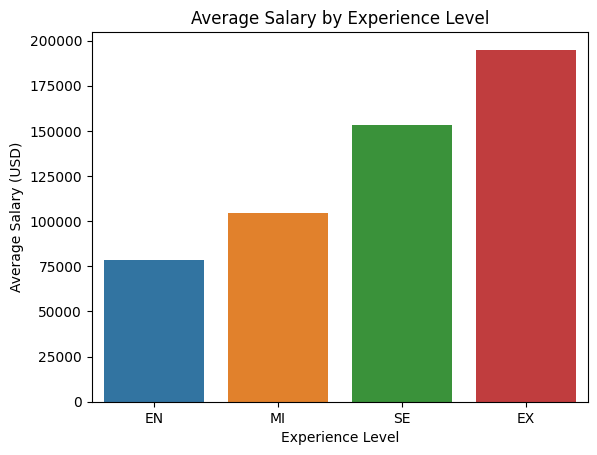

In [5]:
avg_salary_by_exp = df.groupby("experience_level", as_index=False)["salary_in_usd"].mean().sort_values("salary_in_usd")

sns.barplot(data=avg_salary_by_exp, x="experience_level", y="salary_in_usd", hue="experience_level", dodge=False)
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.show()

## Answer:
> The chart shows that average salary increases with experience level, with **executive-level employees** earning the highest and entry-level employees earning the lowest.

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

# Part 3: Predicting salary_in_usd Using Numerical and Encoded Categorical Features

In [6]:
e1 = LabelEncoder()
e2 = LabelEncoder()
e3 = LabelEncoder()
e4 = LabelEncoder()

df["exp_num"] = e1.fit_transform(df["experience_level"])
df["emp_num"] = e2.fit_transform(df["employment_type"])
df["job_num"] = e3.fit_transform(df["job_title"])
df["comp_num"] = e4.fit_transform(df["company_size"])

X = df[["work_year", "exp_num", "emp_num", "job_num", "comp_num"]]
y = df["salary_in_usd"]

X.head()

,work_year,exp_num,emp_num,job_num,comp_num
0,2023,0,2,8,0
1,2023,0,2,8,0
2,2023,0,2,41,0
3,2023,0,2,22,0
4,2023,0,2,8,0


## Answer:
> The data shows all entries are from 2023 with similar experience levels and company sizes, suggesting job title differences may have the biggest impact on salary.

## 📈 Part 4: Train a Linear Regression Model

# Training a Linear Regression Model to Predict Data Science Salaries

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=10)

reg = LinearRegression()
reg.fit(X_tr, y_tr)

y_pr = reg.predict(X_te)

r2 = r2_score(y_te, y_pr)
rmse = np.sqrt(mean_squared_error(y_te, y_pr))

print(f"R2 Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R2 Score: 0.15
RMSE: 58705.43


## Answer:
> The model got an **R² score of 0.15 and an RMSE of 58,705.43**, showing it predicts salaries with low accuracy.

## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [8]:
future_df = pd.DataFrame({
    "work_year": [2024, 2024, 2024, 2024],
    "exp_num": [0, 1, 2, 3],                 # Experience Level → 0=Entry, 1=Mid, 2=Senior, 3=Executive
    "emp_num": [0, 1, 2, 3],                 # Employment Type → 0=Part-time, 1=Full-time, 2=Contract, 3=Freelance
    "job_num": [5, 12, 25, 40],              # Job Title (encoded, 0=Applied Data Scientist, 12=BI Data Analyst, 25="Data Analyst", 40=Data Operations Engineer)
    "comp_num": [0, 1, 2, 2]                 # Company Size → 0=Small, 1=Medium, 2=Large
})

pred_2024 = reg.predict(future_df)

pred_results = pd.DataFrame({
    "Experience Level": ["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
    "Predicted 2024 Salary (USD)": pred_2024
})

pred_results["Predicted 2024 Salary (USD)"] = pred_results["Predicted 2024 Salary (USD)"].round(2)

pred_results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry Level,108258.43
1,Mid Level,122973.65
2,Senior Level,140019.65
3,Executive Level,165603.95


# Answer:
> Based on the predicted 2024 salaries show that pay generally increases with experience level. Entry-level (EN) positions have the lowest average salary, followed by Mid-level (MI), Senior-level (SE), and Executive-level (EX) roles, which previously had the highest salaries. However, in 2024, Executive (EX) salaries are predicted to decrease compared to 2023, while other levels—especially Mid (MI) and Entry (EN)—continue to rise. The salaries might increase because people with more experience, higher positions, or full-time jobs at larger companies tend to earn more money.

### Please see the graph below ⤵️
> additional info for part 5:

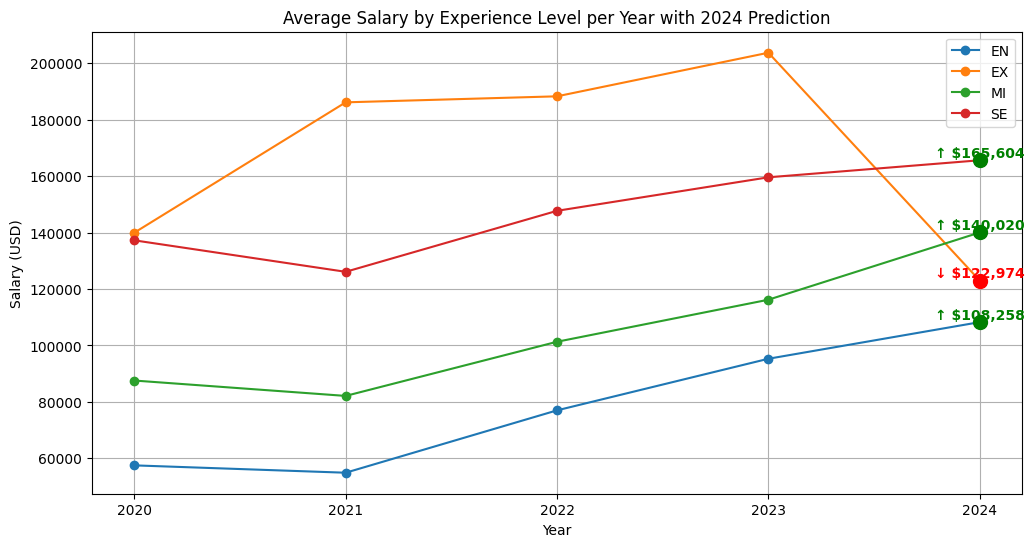

In [9]:
# Historical average salary per year per experience level
avg_salary = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack()

# 2024 predictions
pred_results = pd.DataFrame({
    "Experience Level": ["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
    "Predicted Salary (USD)": [108258.43, 122973.65, 140019.65, 165603.95]
})

# Combine historical averages with 2024 predictions
pred_avg_salary = avg_salary.copy()
for i, level in enumerate(avg_salary.columns):
    pred_avg_salary.loc[2024, level] = pred_results.loc[i, "Predicted Salary (USD)"]

plt.figure(figsize=(12,6))

# Plot lines for each experience level
for level in pred_avg_salary.columns:
    plt.plot(pred_avg_salary.index, pred_avg_salary[level], marker='o', label=level)

# Annotate 2024 predictions with colored arrows
last_year = avg_salary.index.max()
for i, level in enumerate(avg_salary.columns):
    change = pred_avg_salary.loc[2024, level] - avg_salary.loc[last_year, level]
    color = "green" if change >= 0 else "red"
    sign = "↑" if change >= 0 else "↓"
    plt.scatter(2024, pred_avg_salary.loc[2024, level], color=color, s=100, zorder=5)
    plt.text(2024, pred_avg_salary.loc[2024, level] + 1000,
             f'{sign} ${pred_avg_salary.loc[2024, level]:,.0f}', 
             ha='center', color=color, fontweight='bold')

plt.title('Average Salary by Experience Level per Year with 2024 Prediction')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.xticks(list(sorted(df["work_year"].unique())) + [2024])
plt.grid(True)
plt.legend()
plt.show()

## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
   > Yes, the model makes reasonable predictions because it shows that people with more experience earn higher salaries, which is what we usually see in real life. However, it is not completely accurate because it does not take into account other important factors like job title, company size, location, or type of work.

2. What are the limitations of using only `work_year` and `experience_level`?
    > Using only work_year and experience_level is limited because it ignores important things like job title, company size, location, and type of work. These can affect salaries, so the model cannot show the full differences between jobs and companies.

3. How could you improve this model? (Think: more features, better encoding, etc.)
    > To make the model better, we could add more information like job title, company size, location, type of work, and industry. We can show these categories more clearly by making separate columns for each one. Using smarter models and adding extra information like market demand or inflation would also make the predictions more accurate.

4. Why is **R² not enough** to trust your predictions?
    > R² alone is not enough to trust the predictions because it only shows how well the model fits the data it was trained on. It does not guarantee that predictions for new years, jobs, or situations are correct. Other factors like company changes, industry trends, and economic conditions can affect salaries, so the model might not capture these.

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀